In [1]:
import matplotlib.pyplot as plt    
import pandas as pd
import numpy as np

In [2]:
def kernel(point,xmat, k):        
    m,n = np.shape(xmat)        
    weights = np.mat(np.eye((m))     
    for j in range(m):            
        diff = point - X[j]            
        weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))         
    return weights

In [3]:
def localWeight(point,xmat,ymat,k):
    wei = kernel(point,xmat,k)
    W = (X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return W

In [4]:
def localWeightRegression(xmat,ymat,k):
    m,n = np.shape(xmat)        
    ypred = np.zeros(m)        
    for i in range(m):            
        ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)        
    return ypred

In [5]:
def graphPlot(X,ypred):            
    sortindex = X[:,1].argsort(0)        
    xsort = X[sortindex][:,0]              
    fig = plt.figure()        
    ax = fig.add_subplot(1,1,1)        
    ax.scatter(bill,tip, color='green')        
    ax.plot(xsort[:,1],ypred[sortindex], color = 'red', linewidth=5)        
    plt.xlabel('Total bill')        
    plt.ylabel('Tip')        
    plt.show();

In [6]:
data = pd.read_csv('data10_tips.csv')
bill = np.array(data.total_bill) 
tip  = np.array(data.tip)

In [7]:
mbill = np.mat(bill)  
mtip = np.mat(tip)    
m= np.shape(mbill)[1]   
one = np.mat(np.ones(m))    
X = np.hstack((one.T,mbill.T))

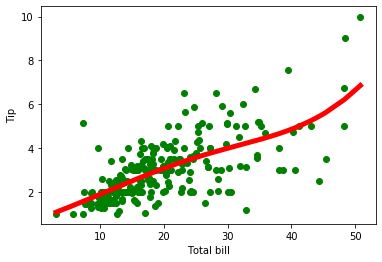

In [8]:
ypred = localWeightRegression(X,mtip,9)     
graphPlot(X,ypred)